<span style="color:blue; font-size:24px;"><b>LSA analysis of university complaints</b></span>

<span style="color:orange; font-size:18px;"><b>0. Loading the data</b></span>

In [1]:
import os
import sys
import pandas as pd

# Project root path
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(BASE_DIR)

DATA_PATH = os.path.join(BASE_DIR, "data", "raw", "Datasetprojpowerbi.csv")
df = pd.read_csv(DATA_PATH)

texts = df["Reports"].tolist()
print(f"Loaded {len(texts)} docs.")

Loaded 1005 docs.


<span style="color:orange; font-size:18px;"><b>1. Cleaning and tokenizing</b></span>

In [2]:
from src.preprocessing.clean_for_lsa_lda import normalize_texts, lemmatize_and_tokenize, apply_ngrams

# 1. Normalization
cleaned_texts = normalize_texts(texts)

# 2. Lemmatization and tokenization
tokenized_texts = lemmatize_and_tokenize(cleaned_texts)

# 3. N-gramms
corpus_tokens = apply_ngrams(tokenized_texts)

print(f"Cleaned and tokenized {len(corpus_tokens)} docs.")

Cleaned and tokenized 1005 docs.


In [3]:
# Checking most common words to include not relevant into domain stopwords and repeat tokenization
from collections import Counter

counts = Counter(token for doc in corpus_tokens for token in doc)
top_100 = counts.most_common(100)
for word, freq in top_100:
    print(word, freq)

student 295
university 170
make 164
find 124
need 123
campus 122
hard 116
option 114
time 108
difficult 107
wish 92
available 87
resource 80
struggle 79
frustrating 77
really 74
get 74
opportunity 69
feel_like 67
class 64
support 63
lack 59
food 55
often 53
offer 53
help 50
provide 49
academic 48
online 48
international 48
course_material 46
take 46
study 46
feel 46
experience 46
course 43
access 41
work 41
pay 37
language 37
enough 36
coursework 36
cause 36
online_class 36
professor 34
challenge 34
job 34
job_opportunity 33
limited 32
important 32
process 32
cultural 32
try 31
learn 31
keep 31
well 30
cost 29
high 28
way 27
field 27
career 27
academic_workload 27
manage 27
always 26
program 26
due 26
mental_health 26
athlete 26
would 25
afford 25
stress 25
would_great 25
certificate 25
material 24
like 24
receive 24
money 24
limited_access 24
skill 24
focus 24
able 23
area 23
balance 23
affordable 23
difficulty 22
overwhelming 21
different 21
new 21
lot 21
connect 21
event 21
financia

In [4]:
# High frequency words but too adstact - not adding important information about the object of a claim. 

domain_stopwords = [    
    "make", "need", "hard", "difficult", "wish", "really", "feel", "experience",
    "get", "feel_like", "often", "student", "university", "lack", "take", "enough",
    "challenge", "limited", "important", "try", "keep", "high", "way", "always", "due", 
    "would", "afford", "would_great", "like", "able", "affordable", "different", "seem",
    "especially", "could", "frustrating"
]

# 2. Lemmatization and tokenization
tokenized_texts = lemmatize_and_tokenize(cleaned_texts, domain_stopwords)

# 3. N-gramms
corpus_tokens = apply_ngrams(tokenized_texts)

print(f"Cleaned and tokenized {len(corpus_tokens)} docs.")

Cleaned and tokenized 1005 docs.


In [5]:
counts = Counter(token for doc in corpus_tokens for token in doc)
top_100 = counts.most_common(100)
for word, freq in top_100:
    print(word, freq)

find 124
campus 122
time 118
option 114
available 87
resource 80
struggle 79
opportunity 69
access 65
class 64
support 63
offer 62
food 55
help 50
provide 49
academic 48
online 48
international 48
study 46
pay 44
course 43
work 41
great 37
language 37
cafeteria 37
coursework 36
cause 36
online_class 36
professor 34
job 34
job_opportunity 33
process 32
cultural 32
learn 31
well 30
course_material 30
cost 29
field 27
career 27
academic_workload 27
manage 27
program 26
athlete 26
stress 25
mental_health 25
sometimes 25
certificate 25
receive 24
money 24
focus 24
area 23
balance 23
access_research_database_material 21
overwhelming 21
new 21
sleep 21
lot 21
connect 21
event 21
financial_aid 21
affair_office 21
quality 20
access_technology_software 20
start 20
college 20
culture 20
see 20
housing 20
worried 19
miss 19
succeed 19
prioritize 19
balance_work_academic_responsibility 19
sport 19
live 19
mental_health_care 19
cause_lot 18
know 18
think 18
much 18
medical 18
near 18
understand 17
a

<span style="color:orange; font-size:18px;"><b>2. Creating dictionary and TF-IDF corpus (better than BoW for LSA)</b></span>

In [6]:
from src.vectorization.vecorize_lsa_lda import build_dictionary, build_corpus

# Creating dictionary for the corpus
dictionary = build_dictionary(corpus_tokens)

# Creating TF-IDF corpus
tfidf_corpus, tfidf_model = build_corpus(corpus_tokens, dictionary, vector_type="tfidf")

print(f"TF-IDF corpus of {len(tfidf_corpus)} docs created.")

TF-IDF corpus of 1005 docs created.


<span style="color:orange; font-size:18px;"><b>3. Training LSA model</b></span>

In [9]:
from src.topic_models.lsa_lda_models import train_lsa, print_topics

num_topics = 11
lsa_model = train_lsa(tfidf_corpus, dictionary, num_topics=num_topics)

print_topics(lsa_model, num_words=10)

Topic 0: -0.393*"option" + -0.312*"campus" + -0.266*"food" + -0.247*"available" + -0.225*"cafeteria" + -0.215*"offer" + -0.183*"find" + -0.166*"resource" + -0.136*"provide" + -0.135*"access"
Topic 1: -0.377*"cafeteria" + -0.333*"option" + -0.303*"food" + 0.222*"resource" + 0.203*"access" + 0.185*"struggle" + 0.160*"find" + 0.158*"time" + 0.150*"support" + -0.146*"campus"
Topic 2: -0.769*"cafeteria" + 0.319*"food" + 0.242*"campus" + 0.181*"dining_hall" + 0.163*"available" + -0.131*"find" + -0.116*"struggle" + -0.102*"offer" + -0.094*"time" + 0.087*"provide"
Topic 3: 0.289*"find" + 0.287*"food" + 0.257*"time" + -0.241*"resource" + -0.194*"support" + 0.190*"struggle" + -0.184*"cafeteria" + -0.175*"international" + 0.161*"academic_workload" + -0.143*"academic"
Topic 4: -0.416*"food" + -0.331*"access" + -0.237*"resource" + -0.230*"academic" + -0.208*"dining_hall" + 0.202*"option" + 0.184*"opportunity" + -0.148*"online" + 0.148*"cantine_offer" + -0.148*"cafeteria"
Topic 5: 0.417*"option" + 0

<span style="color:orange; font-size:18px;"><b>4. Saving the model</b></span>

In [10]:
from src.topic_models.lsa_lda_models import save_model

os.makedirs(os.path.join(BASE_DIR, "models", "lsa"), exist_ok=True)

save_path = os.path.join(BASE_DIR, "models", "lsa", "lsa_1.lsi")
save_model(lsa_model, save_path)

print(f"Model is saved to {save_path}")

Model is saved to /home/dmitry/Projects/IU_claims/models/lsa/lsa_1.lsi


<span style="color:orange; font-size:18px;"><b>5. Topic histogram</b></span>

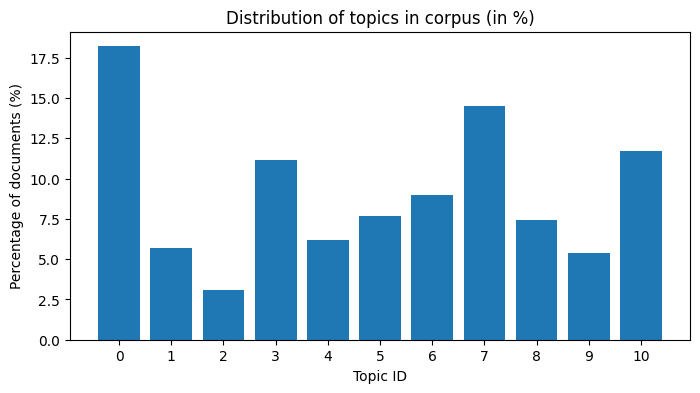

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

top_topics = []
for doc in tfidf_corpus:  
    doc_topics = lsa_model[doc]           
    top_topic = max(doc_topics, key=lambda x: abs(x[1]))[0]    # abs to process negative significance values
    top_topics.append(top_topic)

counts = Counter(top_topics)
topic_ids = list(range(lsa_model.num_topics))
total_docs = len(top_topics)

# Подсчёт процентов
percentages = [(counts.get(t, 0) / total_docs) * 100 for t in topic_ids]

plt.figure(figsize=(8,4))
plt.bar(topic_ids, percentages)

plt.xticks(topic_ids)
plt.ylabel("Percentage of documents (%)")
plt.xlabel("Topic ID")
plt.title("Distribution of topics in corpus (in %)")

plt.show()

In [13]:
counts

Counter({np.int64(0): 183,
         np.int64(7): 146,
         np.int64(10): 118,
         np.int64(3): 112,
         np.int64(6): 90,
         np.int64(5): 77,
         np.int64(8): 75,
         np.int64(4): 62,
         np.int64(1): 57,
         np.int64(9): 54,
         np.int64(2): 31})

<span style="color:orange; font-size:18px;"><b>6. Word cloud for each topic</b></span>

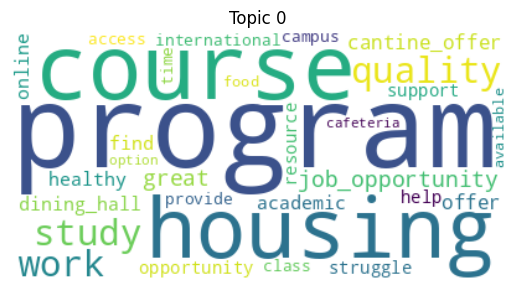

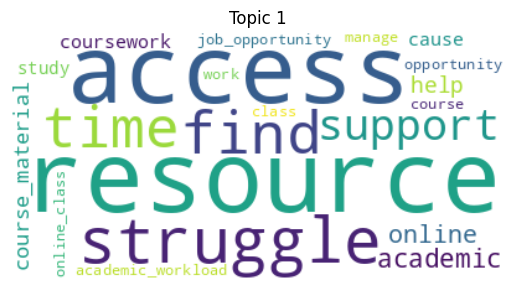

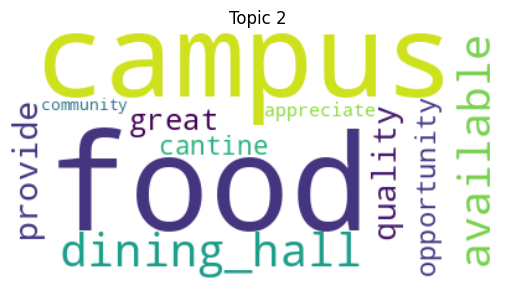

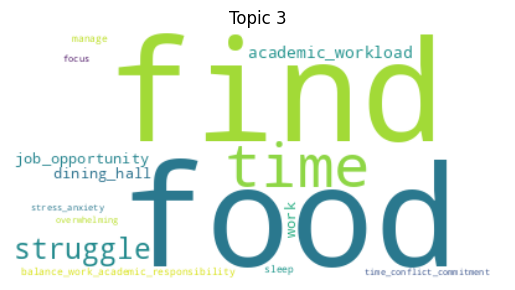

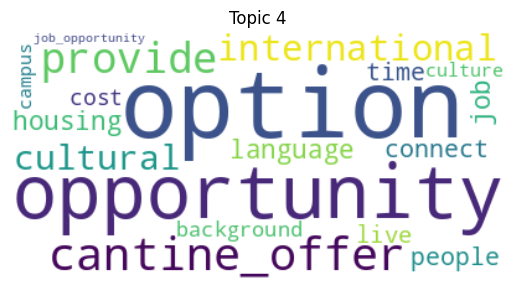

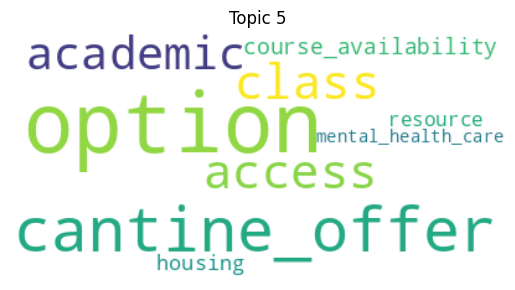

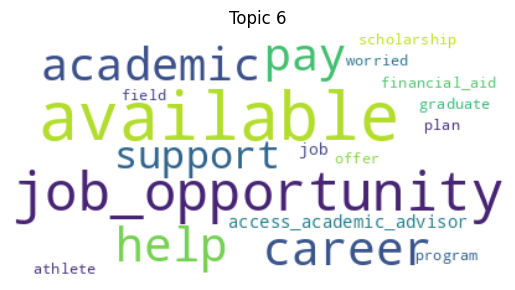

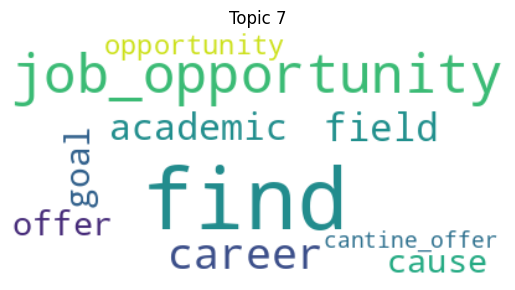

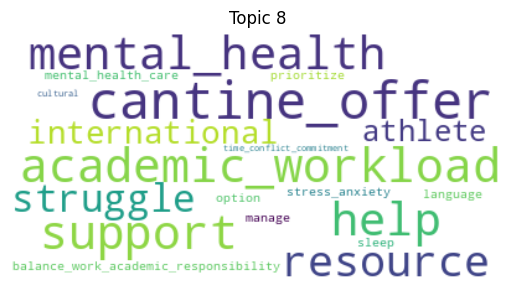

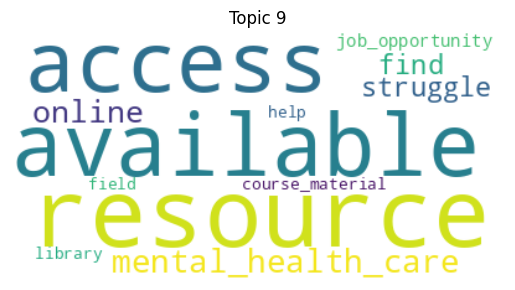

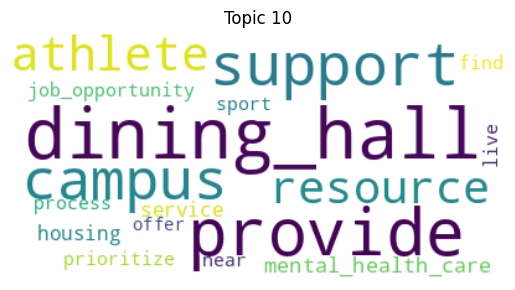

In [12]:
from wordcloud import WordCloud

for topic_id, topic in lsa_model.show_topics(num_words=30, formatted=False):
    topic_words = dict(topic)
    wc = WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(topic_words)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_id}")
    plt.show()

<span style="color:orange; font-size:18px;"><b>7. Topic summary done by ChatGPT based on top-20 words for each topic</b></span>

<h1>Student Complaints Topic Summary (LSA)</h1>

<h2>Topic 0: Campus & Cafeteria Options</h2>
<p>This topic relates to campus facilities, cafeteria, food options, and general resources. Students often mention limited availability and difficulty accessing services.</p>
<p class="keywords">Key words: option, campus, food, available, cafeteria, offer, find, resource, provide, access, class, time, international, support, struggle, help, opportunity, online, academic, healthy</p>

<h2>Topic 1: Support & Academic Resources</h2>
<p>Focuses on access to academic resources, support, and online coursework. Students highlight struggles in finding help, managing time, and accessing course materials.</p>
<p class="keywords">Key words: cafeteria, option, food, resource, access, struggle, find, time, support, academic, online, cantine_offer, dining_hall, help, offer, course_material, coursework, cause, study</p>

<h2>Topic 2: Food Quality & Campus Facilities</h2>
<p>Highlights food quality and dining hall experiences, availability of campus facilities, and general satisfaction with services. Students also mention opportunities and quality improvements.</p>
<p class="keywords">Key words: cafeteria, food, campus, dining_hall, available, find, struggle, offer, time, provide, job_opportunity, quality, academic_workload, process, great, opportunity, balance_work_academic_responsibility, vegetarian, cause, course_material</p>

<h2>Topic 3: Resources & International Students</h2>
<p>This topic covers resource access, support services, and issues faced by international students. Administrative processes, academic workload, and help availability are frequently mentioned.</p>
<p class="keywords">Key words: find, food, time, resource, support, struggle, cafeteria, international, academic_workload, academic, opportunity, access, provide, online, work, job_opportunity, dining_hall, help, learn, balance_work_academic_responsibility</p>

<h2>Topic 4: Food & Academic Access</h2>
<p>Students discuss food, access to resources, academic support, and dining hall quality. The topic also touches on online services and academic advising.</p>
<p class="keywords">Key words: food, access, resource, academic, dining_hall, option, opportunity, cafeteria, cantine_offer, online, provide, international, cultural, cause, support, job, language, quality, housing, access_academic_advisor</p>

<h2>Topic 5: Options & Academic Planning</h2>
<p>Focuses on course options, cantine offers, academic planning, and campus resources. Students report challenges with cultural adaptation, language, and learning support.</p>
<p class="keywords">Key words: option, cantine_offer, food, opportunity, international, language, dining_hall, cafeteria, access, class, cultural, academic, sometimes, learn, connect, course_availability, offer, great, housing, culture</p>

<h2>Topic 6: Class & Online Learning</h2>
<p>Highlights classes, online learning, campus access, and course materials. Students also mention language, international experiences, and academic support challenges.</p>
<p class="keywords">Key words: available, class, job_opportunity, online, career, help, pay, academic, course_material, campus, access, support, language, access_academic_advisor, field, job, international, coursework, sometimes, offer</p>

<h2>Topic 7: Financial Aid & Tuition</h2>
<p>Students discuss tuition, financial aid, certificates, payments, and administrative processes. Career and job opportunities are also considered in this context.</p>
<p class="keywords">Key words: find, job_opportunity, pay, career, process, financial_aid, certificate, field, cost, academic, time, affair_office, financial, goal, cause_lot, tuition, receive, course, opportunity</p>

<h2>Topic 8: Classes & Online Study</h2>
<p>Focuses on classes, online courses, and study motivation. Students report struggles with mental health, academic workload, and balancing responsibilities.</p>
<p class="keywords">Key words: class, online, support, cantine_offer, resource, academic_workload, mental_health, help, struggle, pay, opportunity, mental_health_care, athlete, international, study, balance_work_academic_responsibility, access, option, manage, sleep</p>

<h2>Topic 9: Academic Advising & Resources</h2>
<p>This topic emphasizes academic advising, access to resources, course availability, and online support. Students also mention mental health care and job opportunities.</p>
<p class="keywords">Key words: academic, cause, access_academic_advisor, resource, access, course_availability, available, plan, online, course, mental_health_care, cantine_offer, dining_hall, career, find, time, job_opportunity, struggle, goal, professor</p>

<h2>Topic 10: Availability & Professors</h2>
<p>Students discuss course availability, professors, cantine offers, and resources. Challenges include dining hall services, mental health care, housing, and learning opportunities.</p>
<p class="keywords">Key words: available, course, dining_hall, provide, professor, support, campus, athlete, cantine_offer, mental_health_care, housing, resource, cantine, job_opportunity, help, program, coursework, service, live, learn</p>
